In [1]:
import pandas as pd
import requests
import json




In [11]:
import requests

headers = {
    'accept': 'application/json',
    'Authorization': 'eyJraWQiOiJyRzhja1lKNXFnS2FwNitpVG52UWpmM1pSK1lpRG9GOFY5c1pjR1B3MGUwPSIsImFsZyI6IlJTMjU2In0.eyJjdXN0b206b3JnYW5pemF0aW9uIjoiQXBlLlgsIEluYy4gIiwic3ViIjoiZWE2MzdmZDQtMzczZi00NDIzLThmNDUtNjRiMjAxYjExNDU3IiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImlzcyI6Imh0dHBzOlwvXC9jb2duaXRvLWlkcC51cy1lYXN0LTEuYW1hem9uYXdzLmNvbVwvdXMtZWFzdC0xX0c1allJTEVxWCIsImNvZ25pdG86dXNlcm5hbWUiOiJtYXR0aGV3YmxhaXJ3b3JrQGdtYWlsLmNvbSIsImN1c3RvbTpqb2JfdGl0bGUiOiJBY2FkZW1pYyIsImdpdmVuX25hbWUiOiJNYXR0aGV3IiwiYXVkIjoiMzgwZGlpdG1zYmE3ZDYyMjBoOGxzcTFicW8iLCJldmVudF9pZCI6IjJjMmI4OGI2LWZkMGMtNGQyNy1iOGEzLWI1Yjk3MDc1NmQwMyIsInRva2VuX3VzZSI6ImlkIiwiYXV0aF90aW1lIjoxNjI3OTU2OTU3LCJleHAiOjE2Mjc5NjY5NzEsImlhdCI6MTYyNzk2MzM3MSwiZmFtaWx5X25hbWUiOiJCbGFpciIsImVtYWlsIjoibWF0dGhld2JsYWlyd29ya0BnbWFpbC5jb20ifQ.ciLhr67r119cX9HLKemF9F0GUC-ChildRb0AQ6suAOIlBjt1zrA6XDT7gj0rE_xJalwJDcQ0-5y87ggPGpWT6-nxnrfNgRBD10A49jz8IbEjZjwPt6zDBTwiMg1Ezoxlgvu91t6t9TT69V-1bInMBBJzeuQNf3OQ5InQQygtbP8bgvYRWmry9iIwrLO7cBJX_bGVQMeugeVQKdjlfw56YKIBQZB97s8PbTnxbvTyyOKOnfQ7RnGqqLZEoiggK2qPn6kqi-wI0odwATUnNwcMEAUXwJUkfbRe-syxzTe36Alr6LRR8Y2nFeVUu36QMLB6JwKc7Xkxza4yM0mUhDwAlA',
}

response = requests.get('https://api.theexchange.fanniemae.com/v1/nhs/results', headers=headers)
data_survey = response.json()
print(json.dumps(data_survey,indent=4))

[
    {
        "date": "Jun-21",
        "questions": [
            {
                "id": "Q10",
                "description": "In general do you think our economy is on the right track or is it off on the wrong track?",
                "responses": [
                    {
                        "description": "Right track",
                        "percent": 36.0
                    },
                    {
                        "description": "Wrong track ",
                        "percent": 55.0
                    }
                ]
            },
            {
                "id": "Q11",
                "description": "Looking ahead one year, do you expect your personal financial situation to get much better, somewhat better, stay about the same, get somewhat worse, or get much worse?",
                "responses": [
                    {
                        "description": "Much better/Somewhat better",
                        "percent": 41.0
                    },
 

In [36]:
data_survey[0]["questions"][0]["description"]

'In general do you think our economy is on the right track or is it off on the wrong track?'

In [37]:
data_survey[0]["questions"][0]["responses"]

[{'description': 'Right track', 'percent': 36.0},
 {'description': 'Wrong track ', 'percent': 55.0}]

In [38]:
data_survey[1]["questions"][0]["description"]

'In general do you think our economy is on the right track or is it off on the wrong track?'

In [41]:
data_survey[1]["questions"][0]["responses"]

[{'description': 'Right track', 'percent': 44.0},
 {'description': 'Wrong track ', 'percent': 49.0}]

In [16]:
for l in data_survey[0]["questions"]:
    print(l["description"])

In general do you think our economy is on the right track or is it off on the wrong track?
Looking ahead one year, do you expect your personal financial situation to get much better, somewhat better, stay about the same, get somewhat worse, or get much worse?
 In general, do you think this is a very good time to buy a house, a somewhat good time, a somewhat bad time, or a very bad time to buy a house?
In general, do you think this is a very good time to sell a house, a somewhat good time, a somewhat bad time, or a very bad time to sell a house?
During the next 12 months, do you think home prices in general will go up, go down, or stay the same as where they are now?
 During the next 12 months, do you think home rental prices in general will go up, go down, or stay the same as where they are now?
 During the next 12 months, do you think home mortgage interest rates will go up, go down, or stay the same as where they are now?
Do you think it would be very difficult, somewhat difficult, s

In [51]:
df_survey = pd.DataFrame(data_survey[1]["questions"][0]["responses"])
df_survey = df_survey.T
df_survey.columns = df_survey.iloc[0]
df_survey.drop("description", inplace=True)
df_survey

description,Right track,Wrong track
percent,44,49


In [53]:
df_survey["question"]= data_survey[1]["questions"][0]["description"]
df_survey

description,Right track,Wrong track,question
percent,44,49,In general do you think our economy is on the ...


In [58]:
for survey in data_survey:
    temp = pd.DataFrame(survey["questions"][0]["responses"]).T
    temp.columns = temp.iloc[0]
    temp.drop("description",inplace=True)
    temp["question"]=survey["questions"][0]["description"]
    df_survey.append(temp)
df_survey

    

description,Right track,Wrong track,question
percent,44,49,In general do you think our economy is on the ...


In [76]:
questions = {}
for survey in data_survey:
    for question in survey["questions"]:
        if survey["date"] in questions:
            questions[survey["date"]].append({question['description']:[question['responses'][0]["percent"],question['responses'][1]["percent"]]})
        else:
            questions[survey["date"]]=[{question['description']:[question['responses'][0]["percent"],question['responses'][1]["percent"]]}]

In [81]:
len(questions["Jun-21"])



11

In [79]:
dates = list(questions.keys())

dict_keys(['Jun-21', 'May-21', 'Apr-21', 'Mar-21', 'Feb-21', 'Jan-21', 'Dec-20', 'Nov-20', 'Oct-20', 'Sep-20', 'Aug-20', 'Jul-20', 'Jun-20', 'May-20', 'Apr-20', 'Mar-20', 'Feb-20', 'Jan-20', 'Dec-19', 'Nov-19', 'Oct-19', 'Sep-19', 'Aug-19', 'Jul-19', 'Jun-19', 'May-19', 'Apr-19', 'Mar-19', 'Feb-19', 'Jan-19', 'Dec-18', 'Nov-18', 'Oct-18', 'Sep-18', 'Aug-18', 'Jul-18', 'Jun-18', 'May-18', 'Apr-18', 'Mar-18', 'Feb-18', 'Jan-18', 'Dec-17', 'Nov-17', 'Oct-17', 'Sep-17', 'Aug-17', 'Jul-17', 'Jun-17', 'May-17', 'Apr-17', 'Mar-17', 'Feb-17', 'Jan-17', 'Dec-16', 'Nov-16', 'Oct-16', 'Sep-16', 'Aug-16', 'Jul-16', 'Jun-16', 'May-16', 'Apr-16', 'Mar-16', 'Feb-16', 'Jan-16', 'Dec-15', 'Nov-15', 'Oct-15', 'Sep-15', 'Aug-15', 'Jul-15', 'Jun-15', 'May-15', 'Apr-15', 'Mar-15', 'Feb-15', 'Jan-15', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14', 'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-14', 'Jan-14', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13', 'Jul-13', 'Jun-13', 'May-13', 'Apr-13',

In [86]:
questions_list = []
dates = []
track_values = []
for survey in data_survey:
    for question in survey["questions"]:
        track_values.append([question['responses'][0]['percent'],question['responses'][1]['percent']])
        dates.append(survey["date"])
        questions_list.append(question['description'])
track_values
right_track = [i[0] for i in track_values]
wrong_track = [i[1] for i in track_values]
df_dict = {"date":dates, "questions":questions_list, "right-track":right_track,"wrong_track":wrong_track}
import datetime
df = pd.DataFrame(df_dict)
df["date"]= pd.to_datetime(df["date"],format="%b-%y")
df= df.set_index(df["date"]).drop(columns=['date'])

In [143]:
questions_list

['In general do you think our economy is on the right track or is it off on the wrong track?',
 'Looking ahead one year, do you expect your personal financial situation to get much better, somewhat better, stay about the same, get somewhat worse, or get much worse?',
 ' In general, do you think this is a very good time to buy a house, a somewhat good time, a somewhat bad time, or a very bad time to buy a house?',
 'In general, do you think this is a very good time to sell a house, a somewhat good time, a somewhat bad time, or a very bad time to sell a house?',
 'During the next 12 months, do you think home prices in general will go up, go down, or stay the same as where they are now?',
 ' During the next 12 months, do you think home rental prices in general will go up, go down, or stay the same as where they are now?',
 ' During the next 12 months, do you think home mortgage interest rates will go up, go down, or stay the same as where they are now?',
 'Do you think it would be very di

In [95]:
relevant_questions = []
relevant_questions.append(questions_list[0])
relevant_questions.append(questions_list[2])
relevant_questions.append(questions_list[3])
relevant_questions.append(questions_list[4])
relevant_questions.append(questions_list[6])
relevant_questions

['In general do you think our economy is on the right track or is it off on the wrong track?',
 ' In general, do you think this is a very good time to buy a house, a somewhat good time, a somewhat bad time, or a very bad time to buy a house?',
 'In general, do you think this is a very good time to sell a house, a somewhat good time, a somewhat bad time, or a very bad time to sell a house?',
 'During the next 12 months, do you think home prices in general will go up, go down, or stay the same as where they are now?',
 ' During the next 12 months, do you think home mortgage interest rates will go up, go down, or stay the same as where they are now?']

In [94]:

relevant_questions


['In general do you think our economy is on the right track or is it off on the wrong track?',
 ' In general, do you think this is a very good time to buy a house, a somewhat good time, a somewhat bad time, or a very bad time to buy a house?',
 ' In general, do you think this is a very good time to buy a house, a somewhat good time, a somewhat bad time, or a very bad time to buy a house?']

In [96]:
df

,questions,right-track,wrong_track
date,,,
2021-06-01,In general do you think our economy is on the ...,36.0,55.0
2021-06-01,"Looking ahead one year, do you expect your per...",41.0,16.0
2021-06-01,"In general, do you think this is a very good ...",32.0,64.0
2021-06-01,"In general, do you think this is a very good t...",77.0,15.0
2021-06-01,"During the next 12 months, do you think home p...",48.0,21.0
2021-06-01,"During the next 12 months, do you think home ...",64.0,5.0
2021-06-01,"During the next 12 months, do you think home ...",57.0,6.0
2021-06-01,"Do you think it would be very difficult, somew...",33.0,62.0
2021-06-01,"If you were going to move, would you be more l...",27.0,68.0


In [101]:
relevant_df_q1 = df[df.questions == questions_list[0]]
relevant_df_q1

,questions,right-track,wrong_track
date,,,
2021-06-01,In general do you think our economy is on the ...,36.0,55.0
2021-05-01,In general do you think our economy is on the ...,44.0,49.0
2021-04-01,In general do you think our economy is on the ...,40.0,50.0
2021-03-01,In general do you think our economy is on the ...,37.0,51.0
2021-02-01,In general do you think our economy is on the ...,34.0,52.0
2021-01-01,In general do you think our economy is on the ...,29.0,58.0
2020-12-01,In general do you think our economy is on the ...,36.0,55.0
2020-11-01,In general do you think our economy is on the ...,42.0,48.0
2020-10-01,In general do you think our economy is on the ...,39.0,51.0


In [116]:
relevant_df_q2 = df[df.questions == questions_list[2]]
relevant_df_q3 = df[df.questions == questions_list[3]]
relevant_df_q4 = df[df.questions == questions_list[4]]
relevant_df_q5 = df[df.questions == questions_list[6]]



In [107]:
from datetime import timedelta as td 
import dateutil.parser

In [108]:
relevant_df_q1_2020=relevant_df_q1[relevant_df_q1.index>dateutil.parser.parse("2020-01-01")]
relevant_df_q1_2020

,questions,right-track,wrong_track
date,,,
2021-06-01,In general do you think our economy is on the ...,36.0,55.0
2021-05-01,In general do you think our economy is on the ...,44.0,49.0
2021-04-01,In general do you think our economy is on the ...,40.0,50.0
2021-03-01,In general do you think our economy is on the ...,37.0,51.0
2021-02-01,In general do you think our economy is on the ...,34.0,52.0
2021-01-01,In general do you think our economy is on the ...,29.0,58.0
2020-12-01,In general do you think our economy is on the ...,36.0,55.0
2020-11-01,In general do you think our economy is on the ...,42.0,48.0
2020-10-01,In general do you think our economy is on the ...,39.0,51.0


In [118]:
relevant_df_q2_2020=relevant_df_q2[relevant_df_q2.index>dateutil.parser.parse("2020-01-01")]
relevant_df_q3_2020=relevant_df_q3[relevant_df_q3.index>dateutil.parser.parse("2020-01-01")]
relevant_df_q4_2020=relevant_df_q4[relevant_df_q4.index>dateutil.parser.parse("2020-01-01")]
relevant_df_q5_2020=relevant_df_q5[relevant_df_q5.index>dateutil.parser.parse("2020-01-01")]
relevant_df_q5_2020





,questions,right-track,wrong_track
date,,,
2021-06-01,"During the next 12 months, do you think home ...",57.0,6.0
2021-05-01,"During the next 12 months, do you think home ...",49.0,6.0
2021-04-01,"During the next 12 months, do you think home ...",54.0,7.0
2021-03-01,"During the next 12 months, do you think home ...",54.0,6.0
2021-02-01,"During the next 12 months, do you think home ...",47.0,8.0
2021-01-01,"During the next 12 months, do you think home ...",45.0,9.0
2020-12-01,"During the next 12 months, do you think home ...",43.0,8.0
2020-11-01,"During the next 12 months, do you think home ...",43.0,8.0
2020-10-01,"During the next 12 months, do you think home ...",32.0,11.0


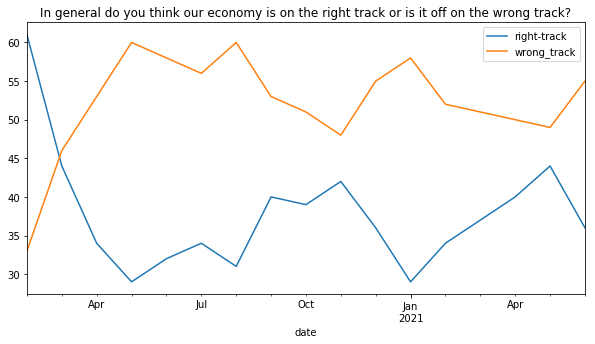

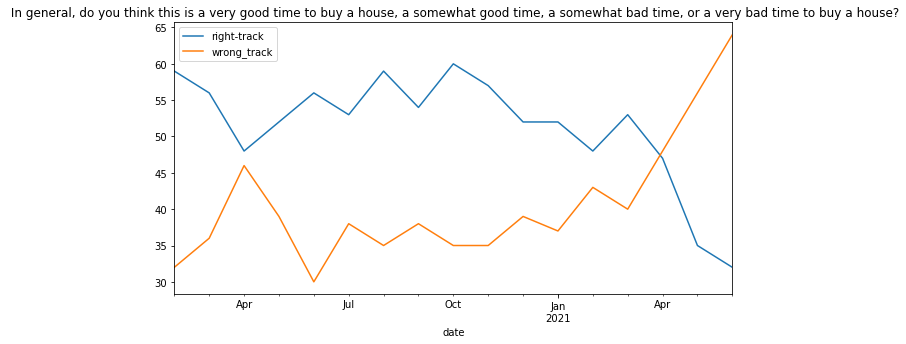

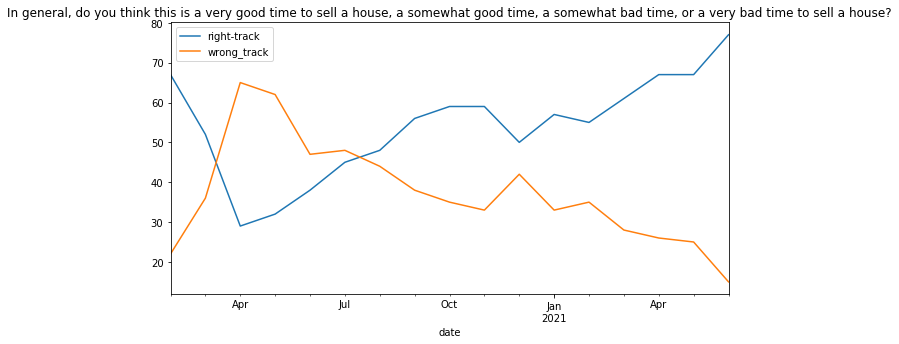

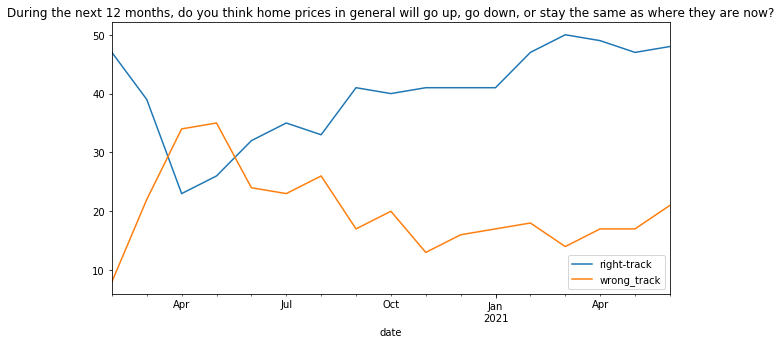

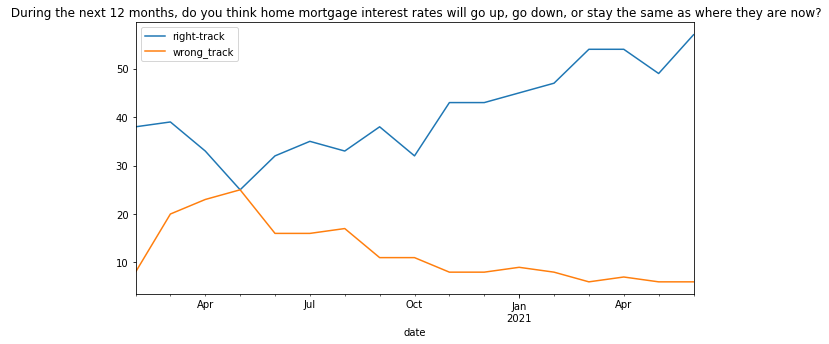

In [124]:
relevant_df_q1_2020.plot(title=questions_list[0],figsize= (10,5))
relevant_df_q2_2020.plot(title=questions_list[2],figsize=(10,5))
relevant_df_q3_2020.plot(title=questions_list[3],figsize=(10,5))
relevant_df_q4_2020.plot(title=questions_list[4],figsize=(10,5))
relevant_df_q5_2020.plot(title=questions_list[6],figsize=(10,5))

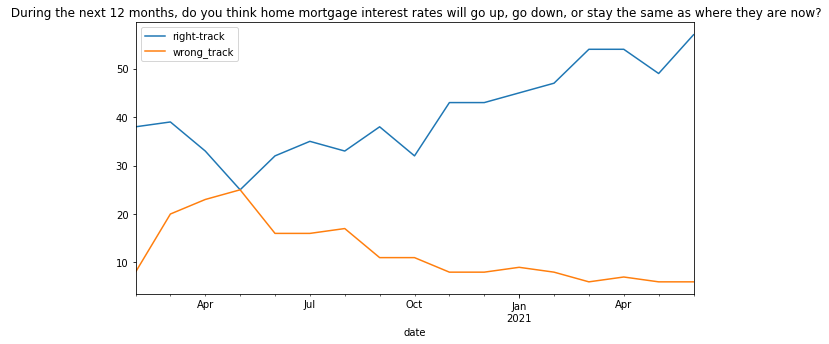

In [147]:
relevant_df_q5_2020.plot(title=questions_list[6],figsize=(10,5))